In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt 

In [2]:
g = 9.81 #m/s2
z0 = 100 # meters

In [3]:
# dz/dt = v
# dv/dt = -g
#u[0] u[1]
# z     v

def myfun(t,u):
    f = np.zeros((2))
    f[0] = u[1]
    f[1] = -g
    return f

In [4]:
#initial conditions
u0 = np.zeros((2))
u0[0] = z0
u0[1] = 0

In [5]:
#time step
t0 = 0
tmax = 5
Dt = 0.1
t = np.arange(t0, tmax, Dt)
NN=np.shape(t)
N = NN[0]

In [6]:
# python solver using built-in RK order 4
sol = solve_ivp(myfun, [t0,tmax], u0, method='RK45', t_eval=t)

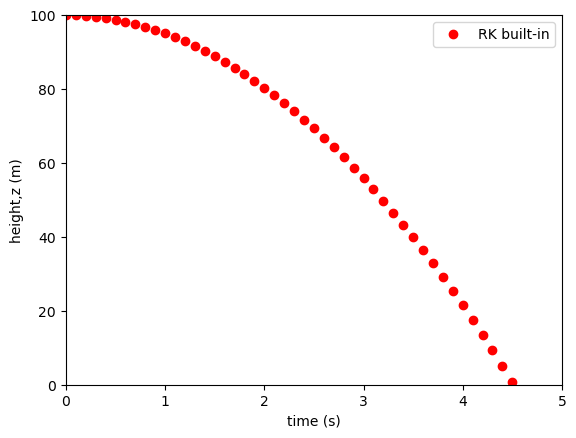

In [7]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label='RK built-in')
plt.xlabel('time (s)')
plt.ylabel('height,z (m)')
plt.legend()

In [8]:
#exact solution
uT = np.zeros((2,N))
for i in range(N):
    uT[0,i] = z0 - g*(t[i]**2)/2
    uT[1,i] = -g*t[i]

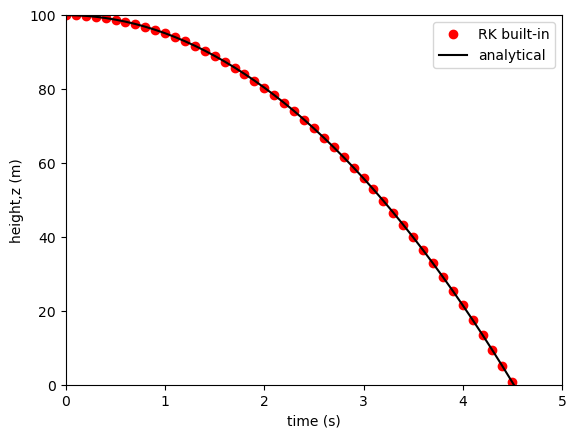

In [9]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label='RK built-in')
plt.plot(t, uT[0,:], 'k-', label='analytical')
plt.xlabel('time (s)')
plt.ylabel('height,z (m)')
plt.legend()

In [18]:
# Euler method
uE = np.zeros((2,N))
uE[:,0] = u0
for i in range(1,N):
    dudt = myfun(t[i-1], uE[:,i-1])
    uE[:,i] = uE[:,i-1] + Dt*dudt

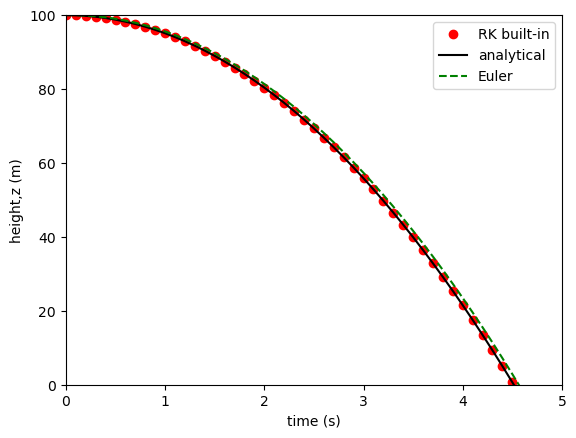

In [19]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label='RK built-in')
plt.plot(t, uT[0,:], 'k-', label='analytical')
plt.plot(t, uE[0,:], 'g--', label='Euler')
plt.xlabel('time (s)')
plt.ylabel('height,z (m)')
plt.legend()

In [20]:
# Runge Kutta custombuilt (4th order)
uRK = np.zeros((2,N))
uRK[:,0] = u0
for i in range(1,N):
    tp = t[i-1]
    up = uRK[:,i-1]
    k1 = myfun(tp,up)
    k2 = myfun(tp+Dt/2, up+Dt/2*k1)
    k3 = myfun(tp+Dt/2, up+Dt/2*k2)
    k4 = myfun(tp+Dt, up+Dt*k3)
    uRK[:,i] = up + Dt/6 * (k1 + 2*k2 + 2*k3 + k4)


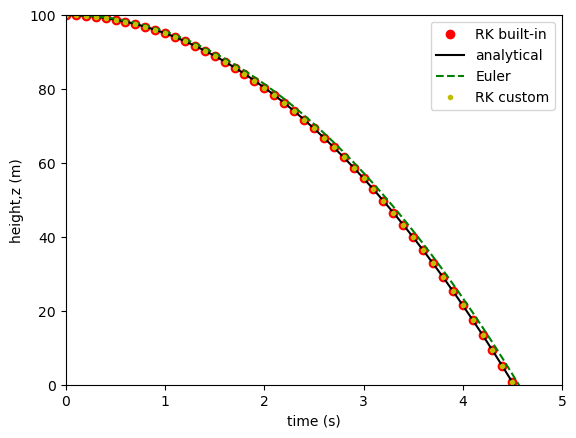

In [24]:
fig1 = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.axis( [t0,tmax, 0, z0] )
plt.plot(sol.t, sol.y[0], 'ro', lw=2, label='RK built-in')
plt.plot(t, uT[0,:], 'k-', label='analytical')
plt.plot(t, uE[0,:], 'g--', label='Euler')
plt.plot(t, uRK[0,:], 'y.', label='RK custom')
plt.xlabel('time (s)')
plt.ylabel('height,z (m)')
plt.legend()

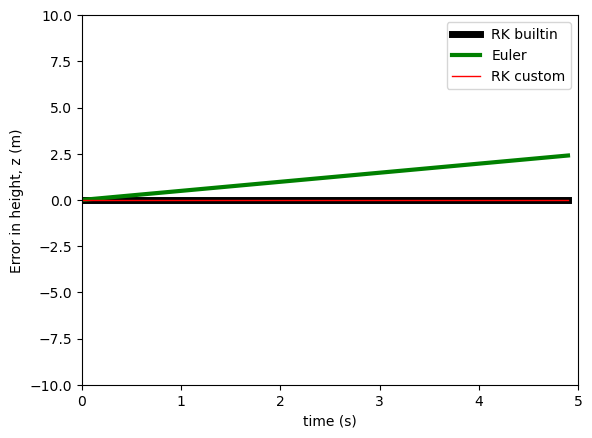

In [27]:
#error 
fig2 = plt.figure()
ax2 = plt.subplot(1,1,1)
plt.axis( [t0,tmax, -10,10] )
plt.xlabel('time (s)')
plt.ylabel('Error in height, z (m)')
plt.plot(sol.t, sol.y[0] - uT[0,:], 'k-', lw=5, label='RK builtin')
plt.plot(t,uE[0,:] - uT[0,:], 'g-', lw=3, label='Euler')
plt.plot(t,uRK[0,:] - uT[0,:], 'r-', lw=1, label='RK custom')

plt.legend()